In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import collections
from collections import Counter
import re

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-358864a12876>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
data = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t') #Tabulation pour la séparation

C:\Users\anoja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,12,18,19,20,21,22,26,27,28,30,51,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed

In [5]:
data.shape

(1555491, 183)

#### Initialement : 1 555 491 Lignes et 183 colonnes 

In [6]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 '

### Réduction du Dataset selon les NaN

In [7]:
(data.isna().sum()/data.shape[0]).sort_values()

code                                          0.000000
url                                           0.000000
created_t                                     0.000000
created_datetime                              0.000000
last_modified_t                               0.000000
last_modified_datetime                        0.000000
states_tags                                   0.000000
states_en                                     0.000000
states                                        0.000000
creator                                       0.000003
pnns_groups_2                                 0.002309
countries                                     0.003316
countries_tags                                0.003319
countries_en                                  0.003319
pnns_groups_1                                 0.011923
product_name                                  0.051142
energy_100g                                   0.203341
proteins_100g                                 0.208796
fat_100g  

#### On constate que de nombreuses colonnes sont très peu remplis (99% de valeurs manquantes)
#### Nous allons donc supprimer les colonnes ayant plus de 90% de valeurs manquantes

In [8]:
data_columns_to_del = data.columns[data.isna().sum()/data.shape[0] >= 0.9].tolist()
data = data.drop(data_columns_to_del, axis = 1)

In [9]:
(data.isna().sum()/data.shape[0]).sort_values()

code                                       0.000000
url                                        0.000000
created_t                                  0.000000
created_datetime                           0.000000
last_modified_t                            0.000000
last_modified_datetime                     0.000000
states_en                                  0.000000
states_tags                                0.000000
states                                     0.000000
creator                                    0.000003
pnns_groups_2                              0.002309
countries                                  0.003316
countries_tags                             0.003319
countries_en                               0.003319
pnns_groups_1                              0.011923
product_name                               0.051142
energy_100g                                0.203341
proteins_100g                              0.208796
fat_100g                                   0.209483
carbohydrate

In [10]:
data.shape

(1555491, 66)

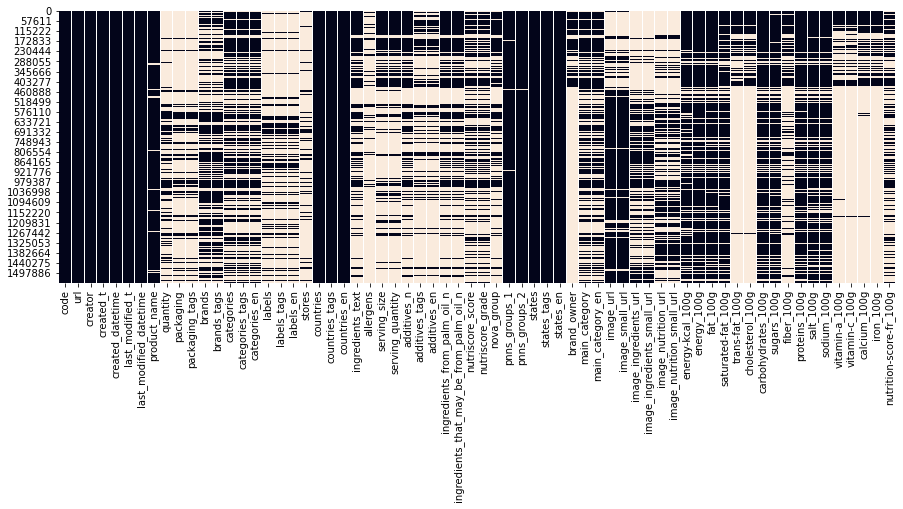

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isna(),cbar=False) 

#### On passe donc de 183 colonnes à 66

### Réduction du Dataset selon les pays

In [12]:
data['countries_en'].unique().tolist()

['France',
 'Spain',
 'United States',
 'Ireland',
 nan,
 'Belgium',
 'United Kingdom',
 'France,United States',
 "Côte d'Ivoire",
 'Canada',
 'Switzerland',
 'Germany',
 'Belgium,France',
 'Peru',
 'Oman',
 'Slovenia',
 'France,Germany',
 'France,Germany,Netherlands',
 'Kuwait',
 'France,Switzerland',
 'Italy',
 'Romania',
 'Australia',
 'Portugal',
 'Tunisia',
 'Dominican Republic',
 'Réunion',
 'Democratic Republic of the Congo',
 'Israel',
 'Netherlands',
 'Saudi Arabia',
 'Luxembourg',
 'Mexico',
 'Rwanda',
 'France,United Kingdom',
 'Belgium,France,Netherlands,United Kingdom',
 'Guadeloupe',
 'Chile',
 'Thailand',
 'Algeria',
 'Greece',
 'Spain,Switzerland',
 'France,Russia',
 'France,India',
 'Austria,France,Spain',
 'Senegal',
 'United Kingdom,United States',
 'Bahrain',
 'Austria,France',
 'Germany,Luxembourg,Spain',
 'Lithuania',
 'Germany,Spain',
 'Jersey',
 'Gibraltar',
 'United Arab Emirates',
 'Canada,Germany,Italy,United States,Argentina-espanol,Armenia-pyсский,Aruba-esp

#### On peut voir que nous avons beaucoup de produits venant de France.
#### Vérifions cela :

In [13]:
data['countries_en'].str.startswith("Fra").value_counts()

False    821508
True     728821
Name: countries_en, dtype: int64

#### Sur un total de 1 555 491 lignes, 728 821 commencent par "FRA" pour France (environ 50% du Dataset).
#### Nous pouvons donc réduire notre Dataset à la France.

In [14]:
data_fr = data[data['countries_en'].str.startswith('Fra', na=False)]

In [15]:
data_fr.shape

(728821, 66)

#### Nous passons donc de 1 555 491 lignes à 728 821

### Suppression des colonnes ayant trop de NaN pour ce nouveau Dataset

In [16]:
(data_fr.isna().sum()/data_fr.shape[0]).sort_values()

code                                       0.000000
states_tags                                0.000000
states_en                                  0.000000
countries_en                               0.000000
countries_tags                             0.000000
countries                                  0.000000
states                                     0.000000
created_t                                  0.000000
url                                        0.000000
last_modified_datetime                     0.000000
created_datetime                           0.000000
last_modified_t                            0.000000
creator                                    0.000001
pnns_groups_2                              0.001984
pnns_groups_1                              0.015628
product_name                               0.032208
image_url                                  0.107930
image_small_url                            0.107930
energy_100g                                0.216338
saturated-fa

In [17]:
data_fr_columns_to_del = data_fr.columns[data_fr.isna().sum()/data_fr.shape[0] >= 0.9].tolist()
data_fr = data_fr.drop(data_fr_columns_to_del, axis = 1)

In [18]:
data_fr.shape

(728821, 57)

In [19]:
(data_fr.isna().sum()/data_fr.shape[0]).sort_values()

code                                       0.000000
states                                     0.000000
countries_en                               0.000000
countries_tags                             0.000000
countries                                  0.000000
states_tags                                0.000000
states_en                                  0.000000
url                                        0.000000
last_modified_datetime                     0.000000
created_t                                  0.000000
created_datetime                           0.000000
last_modified_t                            0.000000
creator                                    0.000001
pnns_groups_2                              0.001984
pnns_groups_1                              0.015628
product_name                               0.032208
image_url                                  0.107930
image_small_url                            0.107930
energy_100g                                0.216338
saturated-fa

#### Nous passons de 66 colonnes à 57

### Suppression des colonnes qui font doublons

In [20]:
data_fr = data_fr.loc[:, ~data_fr.columns.str.endswith('tags')] 
data_fr = data_fr.loc[:, ~data_fr.columns.str.endswith('_en')] # Prend toutes les colonnes ~ sauf 
data_fr = data_fr.loc[:, ~data_fr.columns.str.endswith('_t')] 

In [21]:
data_fr.shape

(728821, 42)

#### On passe de 59 colonnes à 42 colonnes

### Suppression des colonnes non pertinentes

In [22]:
data_fr.columns.tolist()

['code',
 'url',
 'creator',
 'created_datetime',
 'last_modified_datetime',
 'product_name',
 'quantity',
 'packaging',
 'brands',
 'categories',
 'labels',
 'stores',
 'countries',
 'ingredients_text',
 'allergens',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'main_category',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'nutrition-score-fr_100g']

In [23]:
data_fr = data_fr.drop(['code','url','creator','created_datetime','last_modified_datetime','packaging','brands','main_category',
                        'labels','stores','countries','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
                        'ingredients_text','nova_group','pnns_groups_1','pnns_groups_2','states','image_url','image_small_url',
                        'image_ingredients_url','image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url',
                        'energy_100g','sodium_100g','nutrition-score-fr_100g'], axis = 1)

In [24]:
data_fr.shape

(728821, 15)

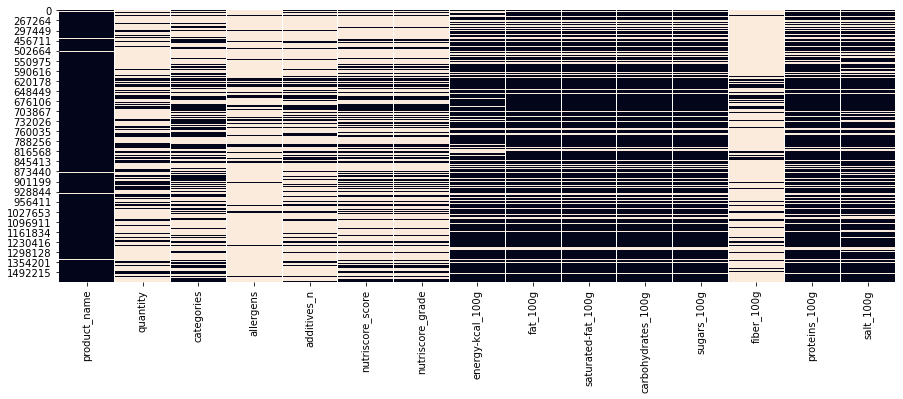

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(data_fr.isna(),cbar=False) 

#### Nous passons de 44 à 15 colonnes pertinentes et exploitables

### Nettoyage sur les variables Categorique et Numérique

### Variable Categorique

In [26]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728821 entries, 0 to 1555490
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_name        705347 non-null  object 
 1   quantity            238066 non-null  object 
 2   categories          323952 non-null  object 
 3   allergens           79765 non-null   object 
 4   additives_n         224712 non-null  float64
 5   nutriscore_score    252374 non-null  float64
 6   nutriscore_grade    252374 non-null  object 
 7   energy-kcal_100g    533532 non-null  float64
 8   fat_100g            565213 non-null  float64
 9   saturated-fat_100g  567336 non-null  float64
 10  carbohydrates_100g  565011 non-null  float64
 11  sugars_100g         566015 non-null  float64
 12  fiber_100g          128775 non-null  float64
 13  proteins_100g       567170 non-null  float64
 14  salt_100g           554615 non-null  float64
dtypes: float64(10), object(5)
memory 

### Remplissage des NaN et Mise en place d'un Dataset avec Other

#### Remplissage des colonnes categoriques contenant des NaN par Other

In [27]:
for index, value in data_fr.dtypes.items(): 
    if value == 'object':
        data_fr[index] = data_fr[index].fillna('Other')


In [28]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728821 entries, 0 to 1555490
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_name        728821 non-null  object 
 1   quantity            728821 non-null  object 
 2   categories          728821 non-null  object 
 3   allergens           728821 non-null  object 
 4   additives_n         224712 non-null  float64
 5   nutriscore_score    252374 non-null  float64
 6   nutriscore_grade    728821 non-null  object 
 7   energy-kcal_100g    533532 non-null  float64
 8   fat_100g            565213 non-null  float64
 9   saturated-fat_100g  567336 non-null  float64
 10  carbohydrates_100g  565011 non-null  float64
 11  sugars_100g         566015 non-null  float64
 12  fiber_100g          128775 non-null  float64
 13  proteins_100g       567170 non-null  float64
 14  salt_100g           554615 non-null  float64
dtypes: float64(10), object(5)
memory 

#### Nous allons remplir les Categories n'étant pas dans les 10 catégories les plus répétées par Other

#### Récupération des 10 catégories qui se répètent le plus

In [29]:
data_fr["categories"].value_counts().head(10).index.tolist()

['Other',
 'Boissons',
 'Viandes, Volailles, Poulets, Filets de poulet',
 'Viandes, Charcuteries, Jambons, Jambons blancs',
 'Snacks, Snacks sucrés, Chocolats, Chocolats noirs',
 'Snacks, Snacks sucrés, Biscuits et gâteaux, Biscuits',
 'Produits laitiers, Produits fermentés, Produits laitiers fermentés, Fromages, Fromages à pâte pressée cuite, Fromages de France, Comté, en:aoc-cheeses, en:labeled-cheeses',
 "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Matières grasses, Produits de l'olivier, Matières grasses végétales, Huiles, Huiles d'olive, Huiles d'olive vierges extra",
 'Boissons, Boissons avec sucre ajouté',
 'Snacks, Snacks sucrés, Confiseries, Bonbons']

In [30]:
data_fr["categories"].nunique()

49340

In [31]:

data_fr.loc[(data_fr["categories"] != "Other")&
             (data_fr["categories"] != "Viandes, Volailles, Poulets, Filets de poulet")&
             (data_fr["categories"] !=  "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Matières grasses, Produits de l'olivier, Matières grasses végétales, Huiles, Huiles d'olive, Huiles d'olive vierges extra")&
             (data_fr["categories"] != "Boissons")&
             (data_fr["categories"] != 'Viandes, Charcuteries, Jambons, Jambons blancs')&
             (data_fr["categories"] != 'Viandes, Volailles, Dindes, Escalopes de dinde')&
             (data_fr["categories"] != 'Viandes, Volailles, Poulets, Cuisses de poulet')&
             (data_fr["categories"] != 'Boissons, Boissons alcoolisées, Vins')& 
             (data_fr["categories"] != "Aliments et boissons à base de végétaux, Aliments d'origine végétale,Aliments à base de fruits et de légumes, Fruits et produits dérivés, Fruits, Fruits tropicaux, Bananes")&
             (data_fr["categories"] != 'Viandes, Volailles, Poulets, Aiguillettes de poulet'), "categories"] = "Other"

In [32]:
data_fr["categories"].nunique()

9

In [33]:
data_fr["categories"].unique()

array(['Other', 'Viandes, Volailles, Poulets, Aiguillettes de poulet',
       'Viandes, Volailles, Poulets, Cuisses de poulet', 'Boissons',
       "Aliments et boissons à base de végétaux, Aliments d'origine végétale, Matières grasses, Produits de l'olivier, Matières grasses végétales, Huiles, Huiles d'olive, Huiles d'olive vierges extra",
       'Viandes, Volailles, Dindes, Escalopes de dinde',
       'Viandes, Volailles, Poulets, Filets de poulet',
       'Viandes, Charcuteries, Jambons, Jambons blancs',
       'Boissons, Boissons alcoolisées, Vins'], dtype=object)

### Variable Numérique

In [34]:
for index, value in data_fr.dtypes.items(): 
    if value != 'object':
        print(index)

additives_n
nutriscore_score
energy-kcal_100g
fat_100g
saturated-fat_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g


### Valeurs aberrantes et atypiques

#### Analyse des valeurs présentes pour chaque colonne

In [35]:
data_fr.describe().round(2)

,additives_n,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,224712.00,252374.00,533532.00,565213.00,5.673360e+05,565011.00,566015.00,128775.00,567170.00,554615.00
mean,1.59,9.49,278.21,14.13,2.397169e+08,27.21,13.84,3.00,8.89,1.26
std,2.35,8.77,199.11,17.42,1.805588e+11,27.83,20.15,5.09,9.98,6.02
min,0.00,-15.00,0.00,0.00,0.000000e+00,0.00,-0.10,0.00,0.00,0.00
25%,0.00,2.00,112.00,1.00,2.000000e-01,2.60,0.60,0.10,1.50,0.06
50%,1.00,10.00,267.00,8.00,2.000000e+00,14.00,3.50,1.60,6.20,0.51
75%,2.00,16.00,402.00,22.00,8.000000e+00,52.00,20.00,3.60,13.00,1.30
max,30.00,40.00,20600.00,153.00,1.360000e+14,704.50,552.00,100.00,128.00,2250.00


#### Suppression des valeurs abberantes & atypiques

In [36]:
data_fr.drop(data_fr[(data_fr['sugars_100g']<0) | (data_fr['sugars_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['fat_100g']<0) | (data_fr['fat_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['saturated-fat_100g']<0) | (data_fr['saturated-fat_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['carbohydrates_100g']<0) | (data_fr['carbohydrates_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['fiber_100g']<0) | (data_fr['fiber_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['proteins_100g']<0) | (data_fr['proteins_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['salt_100g']<0) | (data_fr['salt_100g']>100)].index, inplace=True)
data_fr.drop(data_fr[(data_fr['energy-kcal_100g']>900)].index, inplace=True)

In [37]:
data_fr.describe().round(2)

,additives_n,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
count,224390.00,251910.00,531629.00,563316.00,565445.00,563116.00,564126.00,128597.00,565275.00,552825.00
mean,1.59,9.48,274.92,14.12,5.40,27.19,13.83,2.99,8.88,1.25
std,2.35,8.77,188.63,17.40,7.94,27.78,20.13,5.08,9.97,4.39
min,0.00,-15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2.00,112.00,1.00,0.20,2.60,0.60,0.10,1.50,0.05
50%,1.00,10.00,266.00,7.93,2.00,14.00,3.50,1.60,6.20,0.51
75%,2.00,16.00,400.00,22.00,8.00,52.00,20.00,3.60,12.90,1.30
max,30.00,40.00,900.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


#### Remplissage des NaN de chaque colonne numérique par sa moyenne

In [38]:
for index, value in data_fr.dtypes.items(): 
    if value != 'object':
        data_fr[index] = data_fr[index].fillna(data_fr[index].mean())

In [39]:
data_fr.isnull().sum()

product_name          0
quantity              0
categories            0
allergens             0
additives_n           0
nutriscore_score      0
nutriscore_grade      0
energy-kcal_100g      0
fat_100g              0
saturated-fat_100g    0
carbohydrates_100g    0
sugars_100g           0
fiber_100g            0
proteins_100g         0
salt_100g             0
dtype: int64

In [40]:
data_fr.to_csv(r'C:\Users\anoja\Desktop\OPENCLASSROOMS\Livrables projets\Projet 3\Projet_3_Clean.csv', index = False)